In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read CSV
got_df = pd.read_csv("Resources/got.csv")
got_df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
# Get attacker and defender king data
attacker_king_count = got_df.groupby(["attacker_king"]).count()["battle_number"]
attacker_king_count.index.names = ['Kings']
attacker_king_count.head()

Kings
Balon/Euron Greyjoy          7
Joffrey/Tommen Baratheon    14
Robb Stark                  10
Stannis Baratheon            5
Name: battle_number, dtype: int64

In [5]:
defender_king_count = got_df.groupby(["defender_king"]).count()["battle_number"]
defender_king_count.index.names = ['Kings']
defender_king_count.head()

Kings
Balon/Euron Greyjoy          4
Joffrey/Tommen Baratheon    13
Mance Rayder                 1
Renly Baratheon              1
Robb Stark                  14
Name: battle_number, dtype: int64

In [6]:
# Get total battle data
df = pd.DataFrame(columns = ['attacker_king_count', 'defender_king_count'])
df['attacker_king_count'] = attacker_king_count
df['defender_king_count'] = defender_king_count
df.head()

,attacker_king_count,defender_king_count
Kings,,
Balon/Euron Greyjoy,7,4
Joffrey/Tommen Baratheon,14,13
Robb Stark,10,14
Stannis Baratheon,5,2


In [7]:
sum_column = df['attacker_king_count']+ df['defender_king_count']
df["King Count"] = sum_column
df.head()

,attacker_king_count,defender_king_count,King Count
Kings,,,
Balon/Euron Greyjoy,7,4,11
Joffrey/Tommen Baratheon,14,13,27
Robb Stark,10,14,24
Stannis Baratheon,5,2,7


In [15]:
total = attacker_king_count.add(defender_king_count, fill_value=0)
total

Kings
Balon/Euron Greyjoy         11.0
Joffrey/Tommen Baratheon    27.0
Mance Rayder                 1.0
Renly Baratheon              1.0
Robb Stark                  24.0
Stannis Baratheon            7.0
Name: battle_number, dtype: float64

In [11]:
count = df["King Count"]
count.head()

Kings
Balon/Euron Greyjoy         11
Joffrey/Tommen Baratheon    27
Robb Stark                  24
Stannis Baratheon            7
Name: King Count, dtype: int64

<IPython.core.display.Javascript object>


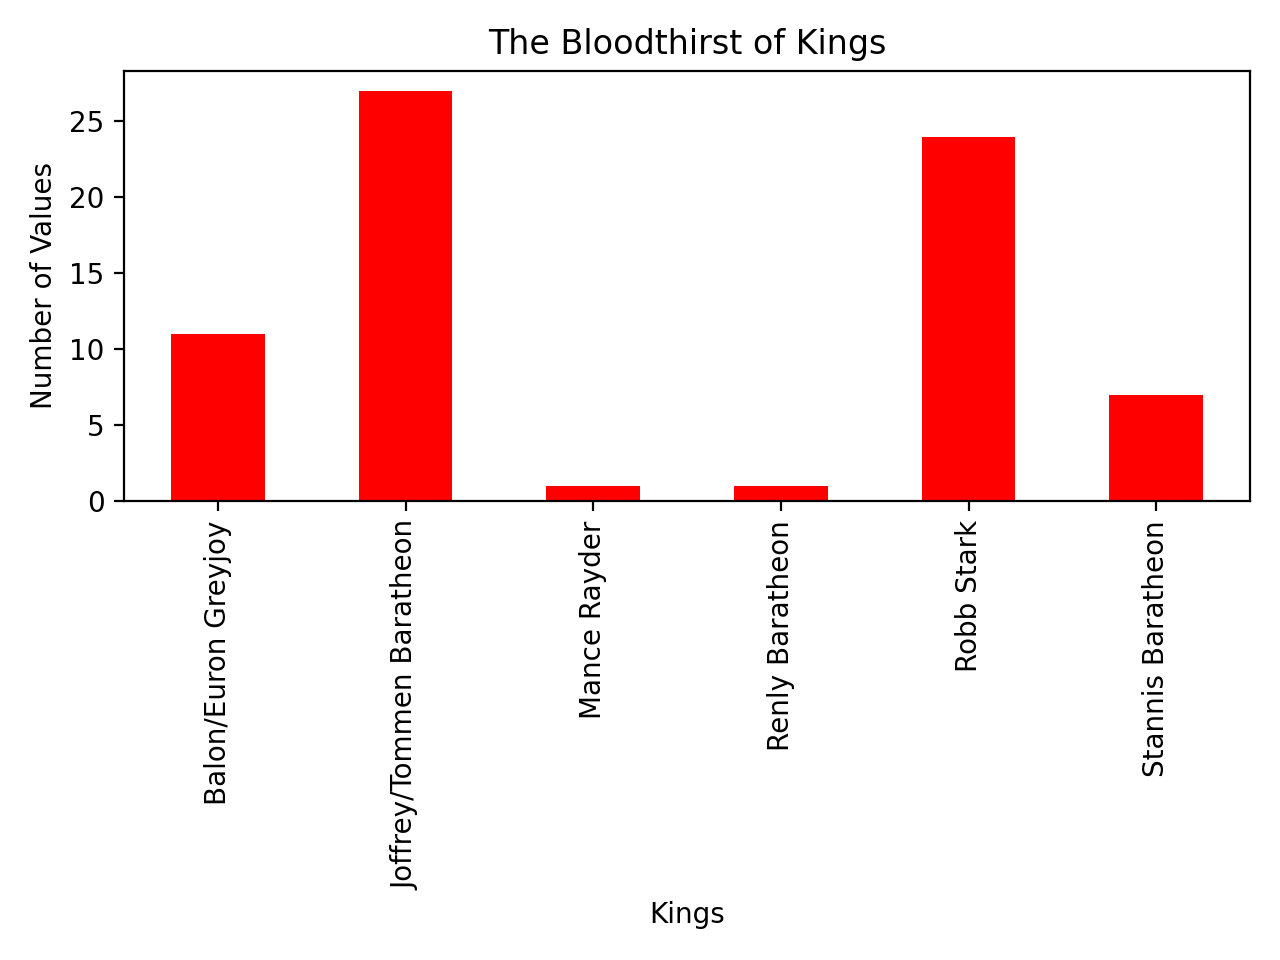

In [17]:
# Configure plot and ticks
# Set textual properties
# Show plot
# Resize plot to display labels
#plt.title("The Bloodthirst of Kings")
total.plot(kind='bar', facecolor='red')
plt.title("The Bloodthirst of Kings")
plt.xlabel("Kings")
plt.ylabel("Number of Values")
plt.tight_layout()
plt.show()
#x_axis = np.arange(len(df))
#tick_locations = [value for value in x_axis]
#plt.bar(x_axis,df['King Count'], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, df.index.values, rotation="vertical");

In [9]:
# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 15)

(0.0, 15.0)

In [10]:
# Set a Title and labels
plt.title("The Bloodthirst of Kings")
plt.xlabel("Kings")
plt.ylabel("Number of Values")

Text(94.19444444444443, 0.5, 'Number of Values')